In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

$$y = f(x) = b + mx$$
$$y = f(x) = w_0 + w_1x$$

# Linear Regression with Mean Error (ME)

In [2]:
def cost(y, y_hat):
    MSE = ((y - y_hat)**2)/(2*y.shape[0])
    J = np.sum(MSE)  
    return J, MSE

def plot_line(X, y, y_hat, MSE):
    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(12, 12))
    plt.subplot(221) 
    plt.plot(X, y_hat)
    plt.scatter(X, y, c='red')
    plt.xlabel(r'$X(m^2)$')
    plt.ylabel(r'$\hat{Y}(k.LE)$')
    plt.xlim(0, 350)
    plt.ylim(0, 600)
    plt.grid()

    plt=plt.subplot(222)
    plt.set_ylim(0, 6000)
    plt.grid()
    X = [1, 2, 3]
    plt.bar(X, MSE)

    
def f(w0, w1): 
    np.random.seed(0)
    X = np.array([100, 175, 300])
    y = np.array([200, 450, 450])
    y_hat = w0 + w1 * X
    J, MSE = cost(y, y_hat)    
    plot_line(X, y, y_hat, MSE)
    print('Cost = ', J)
    print('MSE = ', MSE)
    

In [3]:
interactive_plot = interactive(f, w1=(0.0, 2.0, 0.1), w0=(0, 200, 10))
output = interactive_plot.children[-1]
output.layout.height = '500px'
output.layout.width = '650px'
interactive_plot

interactive(children=(IntSlider(value=100, description='w0', max=200, step=10), FloatSlider(value=1.0, descrip…

## Plot the cost function

$$J(w_0, w_1) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}-y)^2 $$

In [4]:
X = np.arange(50, 400, 5)
w1= np.linspace(-500, 500, 2000)
w0 = np.ones_like(w1)
y = 150 + 1.5 * X
J = np.zeros_like(w1)
J.shape

(2000,)

In [5]:
def cost(y, y_hat):
    MSE = ((y - y_hat)**2)/(2*y.shape[0])
    J = np.sum(MSE)  
    return J, MSE

In [6]:
J.shape

(2000,)

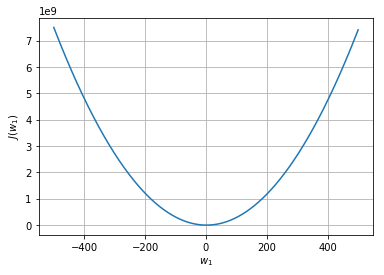

In [7]:
X = np.arange(50, 400, 5)
w1= np.linspace(-500, 500, 1000)
w0 = 150
y = 150 + 1.5 * X
J1 = np.zeros_like(w1)
for i in range(w1.shape[0]):
    y_hat = w0 + w1[i] * X
    J1[i]= cost(y, y_hat)[0]

plt.figure(1)
plt.plot(w1, J1)
plt.xlabel(r'$w_1$')
plt.ylabel(r'$J(w_1)$')
plt.grid()

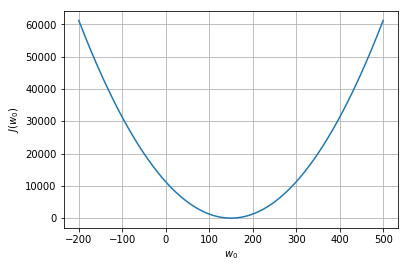

In [8]:
X = np.arange(50, 400, 5)
w0= np.linspace(-200, 500, 1000)
y = 150 + 1.5 * X
w1 = 1.5
J0 = np.zeros_like(w0)
for i in range(w0.shape[0]):
    y_hat = w0[i] + w1 * X
    J0[i]= cost(y, y_hat)[0]
    
plt.figure(1)
plt.plot(w0, J0)
plt.xlabel(r'$w_0$')
plt.ylabel(r'$J(w_0)$')
plt.grid()

# population and profit case study

In [9]:
import pandas as pd
#population in 10k vs profit in 100k
data = pd.read_csv('data/ex1data1.txt', header=None)
data.columns = ['population', 'profit']
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
X = data.iloc[:, 0].values.reshape(-1,1)
y = data.iloc[:, 1].values.reshape(-1,1)

In [11]:
n = X.shape[0]
n

97

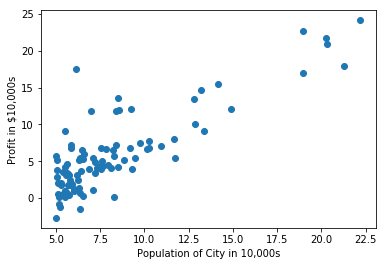

In [12]:
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000180BBE35198>,
      dtype=object)

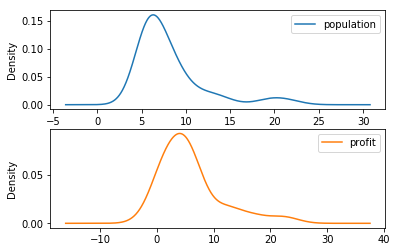

In [13]:
data.plot.density(subplots=True, sharex=False)

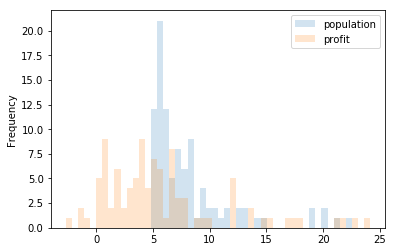

In [14]:
data.plot.hist(bins=50,alpha=0.2)

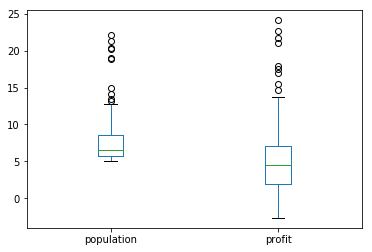

In [15]:
data.plot.box()

In [16]:
pop_q1=data['population'].describe()[4]
pop_q3=data['population'].describe()[6]
pro_q1=data['profit'].describe()[4]
pro_q3=data['profit'].describe()[6]
pop_max=pop_q3+1.5*(pop_q3-pop_q1)
pop_min=pop_q1-1.5*(pop_q3-pop_q1)
pro_max=pro_q3+1.5*(pro_q3-pro_q1)
pro_min=pro_q1-1.5*(pro_q3-pro_q1)
data['population'][data['population']>pop_max]=pop_max
data['population'][data['population']<pop_min]=pop_min
data['profit'][data['profit']>pro_max]=pro_max
data['profit'][data['profit']<pro_min]=pro_min


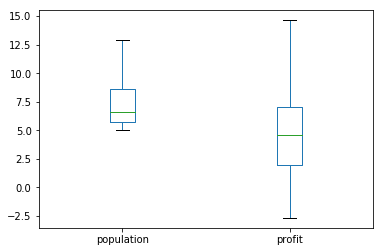

In [17]:
data.plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180BABE9320>,
      dtype=object)

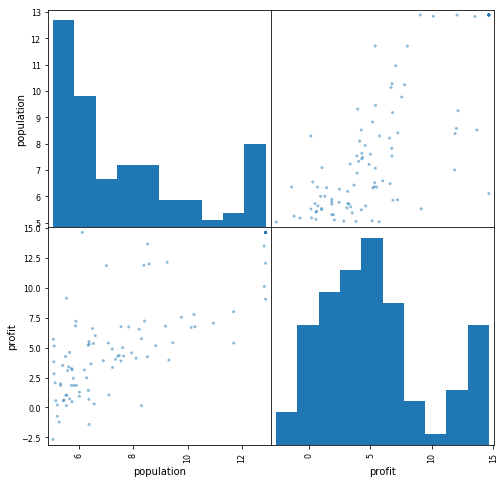

In [18]:
pd.plotting.scatter_matrix(data, figsize= (8,8))

In [19]:
X = np.hstack((np.ones((n,1)), X))
X.shape

(97, 2)

In [20]:
def mse(X, y, W):
    n = y.shape[0]
    Error = np.dot(X, W) - y
    J = np.sum(np.power(Error, 2)) / n
    return J

In [21]:
W = np.zeros([X.shape[1],1])
J = mse(X, y, W)
print(J)

49.093596916148456


In [22]:
def GD(X, y, W, alpha, itr):
    for i in range(itr):
        error = np.dot(X, W) - y
        grad = np.dot(X.T, error)
        W = W - (alpha/n) * grad
    return W

itr = 1500
alpha = 0.01
W = np.zeros([X.shape[1],1])
W = GD(X, y, W, alpha, itr)
print(W)

[[-3.75402554]
 [ 1.21337781]]


In [23]:
J = mse(X, y, W)
print(J)

8.3590552484278


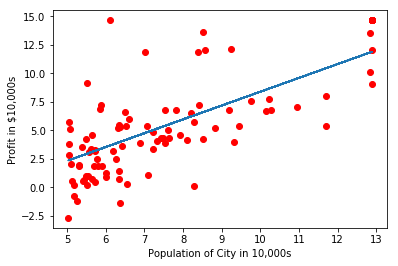

In [24]:
plt.scatter(X[:,1], y, c='r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, W))
plt.savefig('graph.png')
plt.show()

## sklearn model

In [25]:
from sklearn.metrics import mean_squared_error as mse

In [26]:
W = np.zeros([X.shape[1],1])
y_pred = np.dot(X, W)
mse(y, y_pred)

49.093596916148456

In [27]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X, y)
LR.intercept_, LR.coef_ # w0, w1

(array([-4.97463067]), array([[0.        , 1.35767978]]))

In [28]:
W = np.array([LR.intercept_[0], LR.coef_[0,1]])
W

array([-4.97463067,  1.35767978])

In [ ]:
y_pred = np.dot(X, W)
mse(y, y_pred)

In [ ]:
y_pred = LR.predict(X[:5])
y_pred

# R aquared

In [ ]:
import sklearn.metrics as mc

In [ ]:
mc.r2_score(y, y_pred)

In [ ]:
def r_squared(m,X,y):
    yhat = m.predict(X)
    print(yhat)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
return r_squared

# Feature Scaling

In [ ]:
# Max_Min Scaler
X = X / X.max()

In [ ]:
# Features Standarization
X = (X - np.mean(X))/np.std(X)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

# New Case Study

In [ ]:
# Importing the dataset
dataset = pd.read_csv('data/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [ ]:
## Missing Data

In [ ]:
# Taking care of missing data
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
# Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [ ]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
# Splitting Data
from sklearn.cross_validation import train_test_split
X_train,y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)